In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bna = pd.read_csv('bank_note_data.csv')
bna.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
bna.isnull().value_counts()

Image.Var  Image.Skew  Image.Curt  Entropy  Class
False      False       False       False    False    1372
dtype: int64

In [4]:
bna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Image.Var   1372 non-null   float64
 1   Image.Skew  1372 non-null   float64
 2   Image.Curt  1372 non-null   float64
 3   Entropy     1372 non-null   float64
 4   Class       1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [5]:
bna.describe()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [6]:
bna.corr()['Class']

Image.Var    -0.724843
Image.Skew   -0.444688
Image.Curt    0.155883
Entropy      -0.023424
Class         1.000000
Name: Class, dtype: float64

In [7]:
from sklearn.model_selection import train_test_split

In [11]:
X = bna.drop('Class',axis=1).values
y = bna['Class'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
X_train.shape

(960, 4)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

C:\Users\Anu\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Anu\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Anu\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Anu\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type

In [16]:
model =Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [17]:
model.compile(loss='binary_crossentropy',optimizer='adam')

In [18]:
model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 960 samples, validate on 412 samples
Epoch 1/100
960/960 [==============================] - 0s 216us/sample - loss: 0.6817 - val_loss: 0.6769
Epoch 2/100
960/960 [==============================] - 0s 36us/sample - loss: 0.6602 - val_loss: 0.6618
Epoch 3/100
960/960 [==============================] - 0s 61us/sample - loss: 0.6415 - val_loss: 0.6445
Epoch 4/100
960/960 [==============================] - 0s 38us/sample - loss: 0.6171 - val_loss: 0.6209
Epoch 5/100
960/960 [==============================] - 0s 42us/sample - loss: 0.5874 - val_loss: 0.5951
Epoch 6/100
960/960 [==============================] - 0s 37us/sample - loss: 0.5552 - val_loss: 0.5677
Epoch 7/100
960/960 [==============================] - 0s 36us/sample - loss: 0.5160 - val_loss: 0.5333
Epoch 8/100
960/960 [==============================] - 0s 37us/sample - loss: 0.4768 - val_loss: 0.5027
Epoch 9/100
960/960 [======

960/960 [==============================] - 0s 34us/sample - loss: 0.0172 - val_loss: 0.0209
Epoch 76/100
960/960 [==============================] - 0s 60us/sample - loss: 0.0168 - val_loss: 0.0215
Epoch 77/100
960/960 [==============================] - 0s 41us/sample - loss: 0.0167 - val_loss: 0.0211
Epoch 78/100
960/960 [==============================] - 0s 35us/sample - loss: 0.0162 - val_loss: 0.0186
Epoch 79/100
960/960 [==============================] - 0s 36us/sample - loss: 0.0157 - val_loss: 0.0192
Epoch 80/100
960/960 [==============================] - 0s 37us/sample - loss: 0.0155 - val_loss: 0.0185
Epoch 81/100
960/960 [==============================] - 0s 36us/sample - loss: 0.0150 - val_loss: 0.0178
Epoch 82/100
960/960 [==============================] - 0s 37us/sample - loss: 0.0158 - val_loss: 0.0174
Epoch 83/100
960/960 [==============================] - 0s 38us/sample - loss: 0.0151 - val_loss: 0.0169
Epoch 84/100
960/960 [==============================] - 0s 37us/samp

<AxesSubplot:>

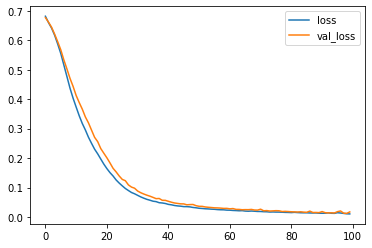

In [19]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [20]:
predictions = model.predict_classes(X_test)

In [21]:
from sklearn.metrics import classification_report,confusion_matrix

In [22]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       219
           1       0.98      1.00      0.99       193

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



In [23]:
print(confusion_matrix(y_test,predictions))

[[216   3]
 [  0 193]]
